In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


![alt text](<SVM Explained.jpg>)

**Support Vector Machine draws a hyper plane in n-dimensional space such that it maximizes the margin between classification groups**


**Glossary :
High Gamma & Low Gamma**
**High Regularization & Low Regularization**


In [7]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
103,6.3,2.9,5.6,1.8,virginica
5,5.4,3.9,1.7,0.4,setosa
113,5.7,2.5,5.0,2.0,virginica
46,5.1,3.8,1.6,0.2,setosa
82,5.8,2.7,3.9,1.2,versicolor


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
n_unique_val = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].nunique()
n_unique_val

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
dtype: int64

In [13]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
df.duplicated().sum()

3

In [15]:
fig = px.box(df, x="sepal_width", color="species",width=800,height=600)
fig.show()

In [16]:
fig = px.box(df, x="sepal_length", color="species",width=800,height=600)
fig.show()

In [17]:
fig = px.box(df, x="petal_length", color="species",width=800,height=600)
fig.show()

In [18]:
fig = px.box(df, x="petal_width", color="species",width=800,height=600)
fig.show()

In [19]:
def search_loc(s,search):
    return search in str(s).lower()

mask = df.apply(lambda x : x.map(lambda s : search_loc(s,'setosa')))

filtered = df.loc[mask.any(axis=1)]
print(filtered)

    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8         

In [20]:
a=df.species=='setosa'
print(a.to_string())

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [21]:
b=df.species=='versicolor'
print(b.to_string())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True

In [22]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [23]:
df0 =df[:50]   #<----- setosa
df1=df[50:100] #<------ versicolor
df2=df[100:] #<---------virginca

In [24]:
fig = px.scatter(df,x='sepal_length',y='sepal_width',color='species',width=600,height=600)
fig.show()

**Setosa's (Sepal_length & Sepal_width) vs Versicolor's(Sepal_length & Sepal_width)**

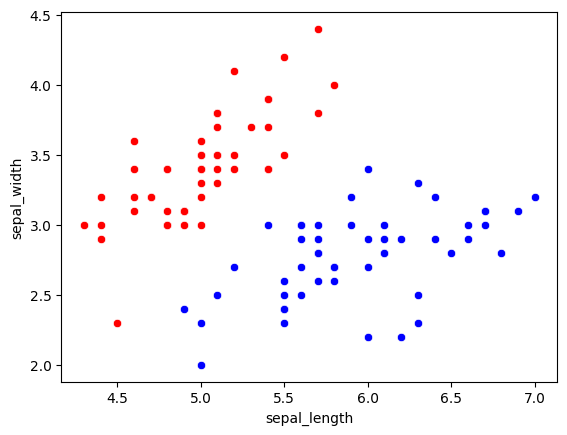

In [25]:
sns.scatterplot(x=df0['sepal_length'] , y=df0['sepal_width'] , color="red") #<-- setosa
sns.scatterplot(x=df1['sepal_length'] , y=df1['sepal_width'] , color="blue")#<----versicolor
plt.show()

**Setosa's (Petal_length & Petal_width) vs Versicolor's(Petal_length & Petal_width)**

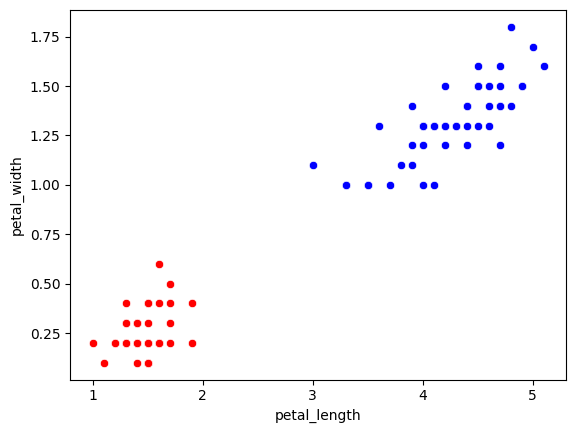

In [26]:
sns.scatterplot(x=df0['petal_length'] , y=df0['petal_width'] , color="red") #<-- setosa
sns.scatterplot(x=df1['petal_length'] , y=df1['petal_width'] , color="blue")#<----versicolor
plt.show()

**Importing Scikit-learn Packages**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop(['species'],axis='columns')
Y = df['species']

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=42)

In [30]:
len(X_train)

120

In [31]:
len(X_test)

30

In [32]:
from sklearn.svm import SVC
model = SVC()


In [33]:
model.fit(X_train,Y_train)

SVC()

In [34]:
model.score(X_test,Y_test)

1.0

In [35]:
model.score(X,Y)

0.98

In [36]:
model.score(X_train,Y_train)

0.975

In [37]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [38]:
model.predict(X_test)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [39]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

**Tuning Parameters**

In [40]:
model_C=SVC(C=5)
model_C.fit(X_train,Y_train)
model_C.score(X_test,Y_test)

1.0

In [41]:
model_g=SVC(gamma=35)
model_g.fit(X_train,Y_train)
model_g.score(X_test,Y_test)

0.8666666666666667